In [39]:
import pandas as pd
import sklearn
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from fbprophet import Prophet

In [40]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

series = read_csv("../data/IndFlaMin.csv", header=0, parse_dates=[1], squeeze=True, date_parser=parser).drop(columns=["Unnamed: 0"])
print(series)

           Date    Index  Inflation  FedMinWage
0    1913-01-01    9.800       0.00        0.00
1    1913-02-01    9.800       0.00        0.00
2    1913-03-01    9.800       0.00        0.00
3    1913-04-01    9.800       0.00        0.00
4    1913-05-01    9.700      -1.02        0.00
...         ...      ...        ...         ...
1208 2013-09-01  234.149       0.12        7.25
1209 2013-10-01  233.546      -0.26        7.25
1210 2013-11-01  233.069      -0.20        7.25
1211 2013-12-01  233.049      -0.01        7.25
1212 2014-01-01  233.916       0.37        7.25

[1213 rows x 4 columns]


In [41]:
series = series.rename(columns={"Date":"ds"})
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [42]:
cpi = series[["ds","Index"]]

In [43]:
cpi = cpi.rename(columns={"Index":"y"})

In [44]:
cpi

,ds,y
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700
...,...,...
1208,2013-09-01,234.149
1209,2013-10-01,233.546
1210,2013-11-01,233.069
1211,2013-12-01,233.049


In [45]:
#This is CPI MODEL
cpiModel = Prophet(seasonality_mode="multiplicative")
cpiModel.fit(cpi)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
#This is CPI Future empty data frames
cpiFuture = cpiModel.make_future_dataframe(periods=120, freq="MS")
cpiFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [47]:
#This is CPI forecast to the empties
cpiForecast = cpiModel.predict(cpiFuture)
cpiForecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1328,2023-09-01,279.414724,264.720508,292.004579
1329,2023-10-01,279.227007,264.308208,292.061597
1330,2023-11-01,279.093138,264.191101,291.570801
1331,2023-12-01,278.677475,263.963261,291.623355
1332,2024-01-01,279.443035,264.408137,292.454216


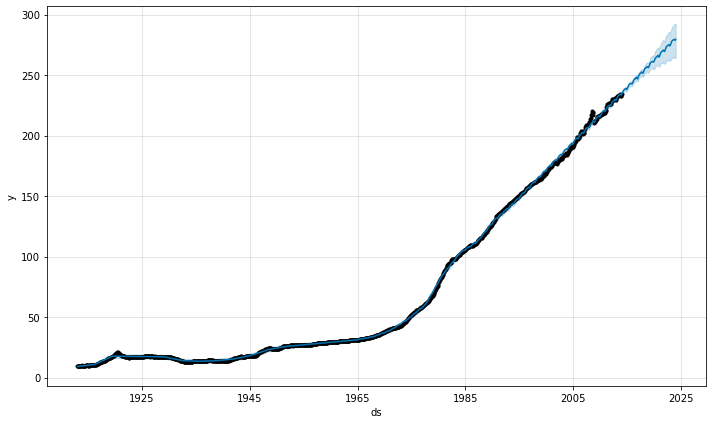

In [48]:
#This is CPI 10 year forecast from 2014
fig1 = cpiModel.plot(cpiForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


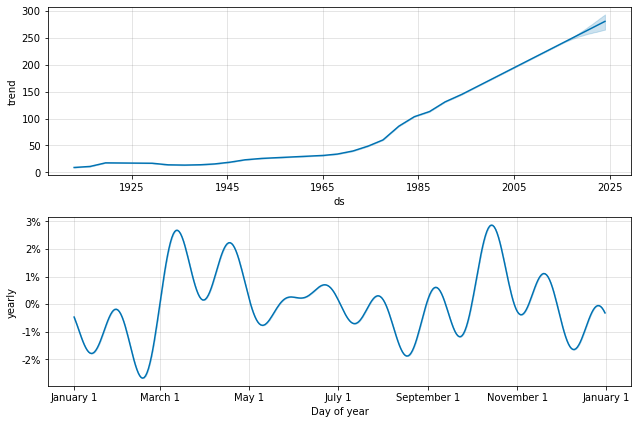

In [49]:
##This is CPI Description
fig2 = cpiModel.plot_components(cpiForecast)

In [50]:
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [51]:
inf = series[["ds","Inflation"]]
inf = inf.rename(columns={"Inflation":"y"})

In [52]:
inf

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,-1.02
...,...,...
1208,2013-09-01,0.12
1209,2013-10-01,-0.26
1210,2013-11-01,-0.20
1211,2013-12-01,-0.01


In [53]:
#This is Inflation MODEL
infModel = Prophet(seasonality_mode="multiplicative")
infModel.fit(inf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
#This is Inflation Future empty data frames
infFuture = infModel.make_future_dataframe(periods=120, freq = "MS")
infFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [55]:
#This is Inflation forecast to the empties
infForecast = infModel.predict(infFuture)
infForecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1328,2023-09-01,0.072450,-0.681774,0.850710
1329,2023-10-01,0.056951,-0.743797,0.847498
1330,2023-11-01,0.044703,-0.780405,0.949848
1331,2023-12-01,0.019582,-0.771117,0.828776
1332,2024-01-01,0.041427,-0.793072,0.860991


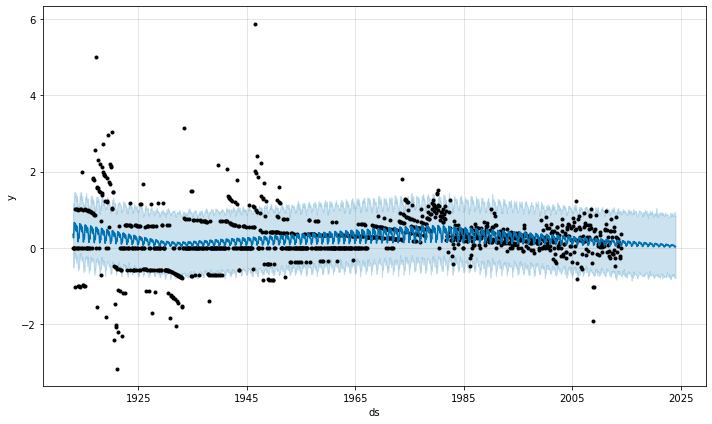

In [56]:
#This is Inflation 10 year forecast from 2014
fig3 = infModel.plot(infForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


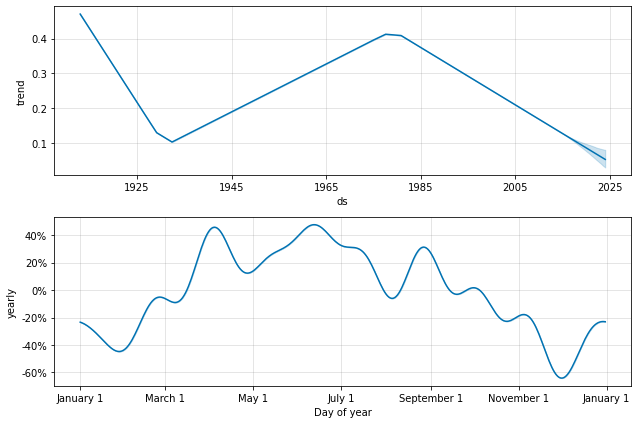

In [57]:
#This is Inflation description
fig4 = infModel.plot_components(infForecast)

In [58]:
fmw = series[["ds","FedMinWage"]]
fmw = fmw.rename(columns={"FedMinWage":"y"})
fmw

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,0.00
...,...,...
1208,2013-09-01,7.25
1209,2013-10-01,7.25
1210,2013-11-01,7.25
1211,2013-12-01,7.25


In [59]:
#This is Federal Min Wage MODEL
fmwModel = Prophet(seasonality_mode="multiplicative")
fmwModel.fit(fmw)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
#This is Federal Min Wage Future empty data frames
fmwFuture = fmwModel.make_future_dataframe(periods=120, freq = "MS")
fmwFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [62]:
#This is Fed Min Wage forecast to the empties
fmwForecast = fmwModel.predict(fmwFuture)
fmwForecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1328,2023-09-01,8.626844,8.294007,8.969374
1329,2023-10-01,8.632972,8.311013,8.982265
1330,2023-11-01,8.629803,8.282733,8.983215
1331,2023-12-01,8.633348,8.274062,8.948735
1332,2024-01-01,8.645162,8.315946,9.002569


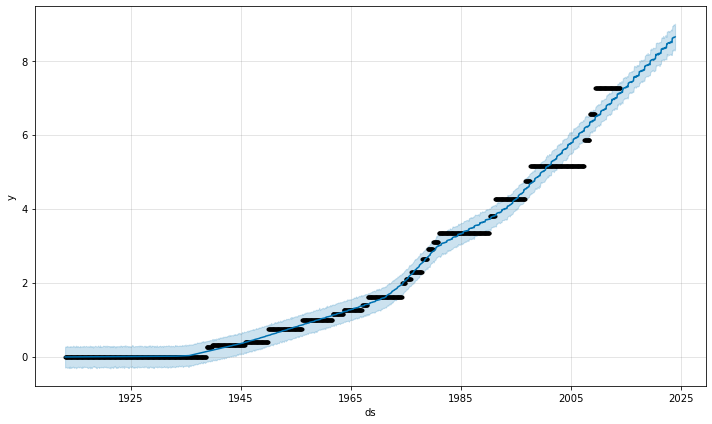

In [63]:
# Fed min wage 10 year forecast
fig5 = fmwModel.plot(fmwForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


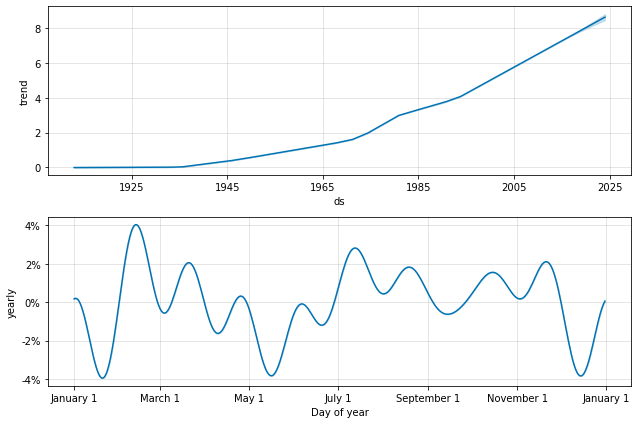

In [64]:
#fedminwage data description
fig5 = fmwModel.plot_components(fmwForecast)

In [65]:
cpiForecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1913-01-01,9.147507,7.479087,10.760307,9.147507,9.147507,-0.004715,-0.004715,-0.004715,-0.004715,-0.004715,-0.004715,0.0,0.0,0.0,9.104372
1,1913-02-01,9.192853,7.483952,10.772061,9.192853,9.192853,-0.002732,-0.002732,-0.002732,-0.002732,-0.002732,-0.002732,0.0,0.0,0.0,9.167735
2,1913-03-01,9.233810,7.649740,10.830402,9.233810,9.233810,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.0,0.0,0.0,9.241331
3,1913-04-01,9.279156,7.635133,11.064982,9.279156,9.279156,0.001732,0.001732,0.001732,0.001732,0.001732,0.001732,0.0,0.0,0.0,9.295226
4,1913-05-01,9.323039,7.751763,11.074793,9.323039,9.323039,0.001902,0.001902,0.001902,0.001902,0.001902,0.001902,0.0,0.0,0.0,9.340771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2023-09-01,278.988208,264.720508,292.004579,264.488963,291.059294,0.001529,0.001529,0.001529,0.001529,0.001529,0.001529,0.0,0.0,0.0,279.414724
1329,2023-10-01,279.360227,264.308208,292.061597,264.684657,291.580897,-0.000477,-0.000477,-0.000477,-0.000477,-0.000477,-0.000477,0.0,0.0,0.0,279.227007
1330,2023-11-01,279.744646,264.191101,291.570801,264.857194,292.119887,-0.002329,-0.002329,-0.002329,-0.002329,-0.002329,-0.002329,0.0,0.0,0.0,279.093138
1331,2023-12-01,280.116665,263.963261,291.623355,264.954845,292.721893,-0.005138,-0.005138,-0.005138,-0.005138,-0.005138,-0.005138,0.0,0.0,0.0,278.677475
